## Testing for data scrabing on Esco and Jobnet

In [1]:
# Import magics

# !pip install selenium
# !pip install webdriver_manager
# !python -m nltk.downloader popular
# !pip install tensorflow
# !pip install spacy
# !pip install wordloud
# !python -m spacy download da_core_news_md

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from pathlib import Path
import re
import requests
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By
from bs4 import BeautifulSoup
from io import StringIO
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
import tensorflow as tf
import spacy
from spacy import displacy
from tensorflow.keras import layers
stop_word = nltk.corpus.stopwords.words('danish')
from sklearn.feature_extraction.text import CountVectorizer
from spacy.lang.da.stop_words import STOP_WORDS
import string
from function import *
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
nlp = spacy.load('da_core_news_md')
output = Path(r'Exam/output')

## Selecting data on Jobindex

In [2]:
from queue import Empty

def extract_jobindex(tag, pages):
    flat_list = []
    url_list = []
    total_pages = range(pages)
    headers = {'User-Agent':'kjp538@alumni.ku.dk'}


    for page in total_pages:
        url = f"https://www.jobindex.dk/jobsoegning?maxdate=20220101&mindate=20210101&page={page}&jobage=archive&q={tag}"
                        
        r = requests.get(url, headers)
            
        soup = BeautifulSoup(r.content.decode("utf-8"), "html.parser")
                        
        divs = soup.find_all("div", class_="jobsearch-result")
        
        for item in divs:
            try:
                job_url = item.select_one('[data-click*="u="]:has(> b)')['data-click']
                url_list.append(job_url)
            except:
                pass

        for i in url_list:
            link = 'http://www.jobindex.dk' + i
            flat_list.append(link)

    return flat_list

job = extract_jobindex('cand.oecon', 1)

### Cleaning Jobindex data

In [3]:
vectorizer = CountVectorizer()
porter = nltk.PorterStemmer()
nltk.download('omw-1.4')
wnl = nltk.WordNetLemmatizer()

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/nicolaibernsen/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [4]:
search_list = ['cand.psych', 'cand.polit', 'cand.scient.pol', 'cand.scient.anth', 'cand.scient.soc']

def clean_jobindex(search_word, pages):
    final_job = []
    jobindex = []
    info_job = [] 
    flat_list = []
    final_list = []

    headers = {'User-Agent':'kjp538@alumni.ku.dk'}
    job = extract_jobindex(search_word, pages)
    

    for i in job:
        url = f"{i}"
        r = requests.get(url, headers)
        soup = BeautifulSoup(r.content.decode("utf-8"), "html.parser")
        iframe = soup.find_all('iframe', class_='archive-content')
        for i in iframe:
            link = i['src']
            info_job.append(link)

    for item in info_job:
        links = 'http://www.jobindexarkiv.dk/cgi/showarchive.cgi' + item
        jobindex.append(links)


    for i in jobindex:
        url_ = f"{i}"
        r = requests.get(url_, headers)
        soup = BeautifulSoup(r.content.decode("utf-8"), "html.parser")
        content = soup.find_all('body')
        for i in content:
            text = i.get_text()
            flat_list.append(text)

    job_ = ' '.join(str(i) for i in flat_list)
    _job = nltk.word_tokenize(clean_text(job_))
    for word in _job:
        if word not in stop_word:
            final_job.append(word)
            
    return final_job

# jobindex_psych = [wnl.lemmatize(i) for i in clean_jobindex('cand.psych')]
# jobindex_oecon = [wnl.lemmatize(i) for i in clean_jobindex('cand.oecon', 1)]
# jobindex_pol = [wnl.lemmatize(i) for i in clean_jobindex('cand.scient.pol')]
# jobindex_anth = [wnl.lemmatize(i) for i in clean_jobindex('cand.scient.anth')]
# jobindex_soc = [wnl.lemmatize(i) for i in clean_jobindex('cand.scient.soc')]

# psych = ' '.join(jobindex_psych)
# oecon = ' '.join(jobindex_oecon)
# pol = ' '.join(jobindex_pol)
# anth = ' '.join(jobindex_anth)
# soc = ' '.join(jobindex_soc)

jobindex_oecon = clean_jobindex('cand.oecon', 1)
# jobindex_oecon

['demant',
 's',
 'graduate',
 'programme',
 'global',
 'business',
 'working',
 'demant',
 'meet',
 'our',
 'employees',
 'graduate',
 'programme',
 'about',
 'us',
 'welcome',
 'to',
 'demant',
 's',
 'graduate',
 'programme',
 'we',
 'offer',
 'you',
 'a',
 'career',
 'in',
 'a',
 'global',
 'medical',
 'healthcare',
 'company',
 'where',
 'you',
 'can',
 'look',
 'forward',
 'to',
 'an',
 'open',
 'and',
 'fun',
 'work',
 'environment',
 'a',
 'look',
 'our',
 'graduate',
 'film',
 'to',
 'get',
 'a',
 'first',
 'impression',
 'demant',
 'graduate',
 'programme',
 'youtube',
 'about',
 'demant',
 'demant',
 'is',
 'an',
 'international',
 'leading',
 'c',
 'company',
 'within',
 'hearing',
 'healthcare',
 'we',
 'operate',
 'in',
 'a',
 'global',
 'market',
 'with',
 'companies',
 'in',
 'more',
 'than',
 'countries',
 'our',
 'products',
 'are',
 'sold',
 'in',
 'more',
 'than',
 'countries',
 'and',
 'we',
 'employees',
 'worldwide',
 'demant',
 'generates',
 'an',
 'annual',
 'r

In [5]:
write_text('cand.oecon', jobindex_oecon)

In [7]:
def stacy_words(input):
    document = nlp(open(f'{input}', encoding="utf-8").read())
    adjs = []
    for token in document:
       if token.pos_ == 'ADJ':
        adjs.append(token.lemma_)
    # adjs_tally = Counter(adjs)
    # adjs_tally.most_common()
        adj = ' '.join(adjs)
    return adj

In [8]:
oecon_adjs = stacy_words('/Users/nicolaibernsen/Desktop/KU/9.Semester/Introduction_to_Social_Datascience/ISDS/Exam/cand.oecon.txt')

### Plotting Jobindex data using Wordcloud

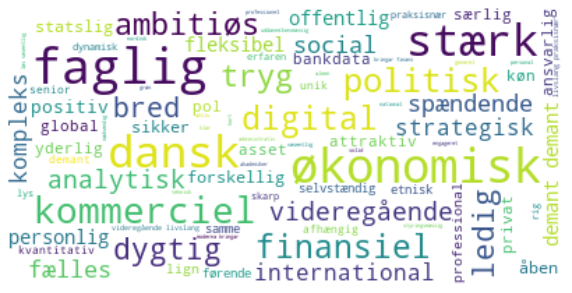

In [9]:
stopwords = set(STOPWORDS)

stopwords.update(['hr','bringe','ppr','vores','ønsker','nye','hverdag','del','inden','søger', 
'kan','egedal','oktober','kompetencer','li','ul','text','align','justify','br','p','div','strong',
'style','href','både','ung','halsnæs','egen','daglig','hel','vigtig','relevant','velkommen','tidlig','første','enkelt','tæt','flest',
'høj','ny','fast','mulig','lille','øvrig','mange','meget','central','voksen','stor','gammel','konkret','aktuel','ugenligt','gavn','formår',
'god','vant','int','fig','centralt','evalueres','mittag','løbende','spise','nær','nemmere'])

wordcloud = WordCloud(stopwords=stopwords, max_font_size=35, max_words=100, background_color='white').generate(oecon_adjs)
fig = plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
wordcloud = WordCloud(stopwords=stopwords, max_font_size=35, max_words=100, background_color='white').generate(oecon)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Importing skills from ESCO

In [11]:
occupations = ['http://data.europa.eu/esco/occupation/99492920-e5a5-4dba-9e5a-93193147198c', 
'http://data.europa.eu/esco/occupation/11df8941-508c-4103-ad40-52cdf9430a59', 
'http://data.europa.eu/esco/occupation/acf69cab-8629-45c8-ae10-c8fb15f474b6', 
'http://data.europa.eu/esco/occupation/52ded7d7-11df-42e3-b90a-d7f4b70fb4b9',
'http://data.europa.eu/esco/occupation/4f89b0d2-b666-4890-af01-25d1d60da1f3']

jobs = pd.DataFrame(columns=['job_title', 'essential_skill', 'optional_skill'])

for i in occupations:
    jobs = jobs.append(fetching_occupation(i))

jobs = jobs.apply(lambda x: x.replace({'økonom':'cand.oecon', 'psykolog':'cand.psych', 'antropolog':'cand.scient.anth', 
'politolog':'cand.scient.pol', 'sociolog':'cand.scient.soc'}, regex=True))

In [12]:
oecon_esco = jobs.loc[jobs['job_title'] == 'cand.oecon']
search_words = []
for value in oecon_esco['optional_skill']:
    search_words.append(value)
    
search_words

['indholdsmarkedsføringsstrategi',
 'forskrifter vedrørende international import og eksport',
 'udvikle videnskabelige teorier',
 'offentlig ret',
 'civilret',
 'rådgive om cand.oeconisk udvikling',
 'forudsige cand.oeconiske tendenser',
 'skrive forslag til forskning',
 'skrive videnskabelige rapporter',
 'udvikle cand.oeconipolitikker',
 'gennemføre PR-aktiviteter',
 'finansielle markeder',
 'salgsfremmende teknikker',
 'analysere en virksomheds finansielle resultater',
 'regnskabsanalyse']

In [ ]:
oecon.find('markedet')

## Scraping UG

In [ ]:
search_list = ['cand.psych', 'cand.oecon', 'cand.scient.pol', 'cand.scient.anth', 'cand.scient.soc']

education_url = []

for k in search_list:
    for i in range(1):
        try: 
            education_url.append(UG(i,k))
        except:
            break
        
education_url[1].pop(0)
del education_url[4][0:3]

In [ ]:
psych = nltk.word_tokenize(extract_UG(education_url[0][0]))
oecon = nltk.word_tokenize(extract_UG(education_url[1][0]))
pol = nltk.word_tokenize(extract_UG(education_url[2][0]))
anth = nltk.word_tokenize(extract_UG(education_url[3][0]))
soc = nltk.word_tokenize(extract_UG(education_url[4][0]))
psych_final = []
for word in psych:
    if word not in stop_word:
        psych_final.append(word)

psych_final

In [ ]:
# write_text('psych', psych_final)

In [ ]:
psych_text = tf.data.TextLineDataset('/Users/nicolaibernsen/Desktop/KU/9.Semester/Introduction_to_Social_Datascience/ISDS_edit/Exam/psych.txt').filter(lambda x: tf.cast(tf.strings.length(x), bool))

def custom_standardization(input_data):
  lowercase = tf.strings.lower(input_data)
  return tf.strings.regex_replace(lowercase,
                                  '[%s]' % re.escape(string.punctuation), '')


# Define the vocabulary size and the number of words in a sequence.
vocab_size = 4096
sequence_length = 10

# Use the `TextVectorization` layer to normalize, split, and map strings to
# integers. Set the `output_sequence_length` length to pad all samples to the
# same length.
vectorize_layer = layers.TextVectorization(
    standardize=custom_standardization,
    max_tokens=vocab_size,
    output_mode='int',
    output_sequence_length=sequence_length)

vectorize_layer.adapt(psych_text.batch(4096))
inverse_vocab = vectorize_layer.get_vocabulary()
print(inverse_vocab[:20])

In [ ]:
SEED = 42
AUTOTUNE = tf.data.AUTOTUNE
text_vector_ds = psych_text.batch(1024).prefetch(AUTOTUNE).map(vectorize_layer).unbatch()
sequences = list(text_vector_ds.as_numpy_iterator())
print(len(sequences))

In [ ]:
for seq in sequences[:10]:
  print(f"{seq} => {[inverse_vocab[i] for i in seq]}")